# Sociology 130AC Module: "The Neighborhood Project"

Welcome to the data science part of your project! You have gathered data and entered it [here](https://docs.google.com/forms/d/e/1FAIpQLSc1dLe7Hh_fu-VSV7Y-gcVsniaFP94kpl1Sw4x1-CE9nmTZjg/viewform) from census tracts.  Now it's time to quantify your observations using Python for basic data science. However, you will not need any prior programming knowledge as the purpose is not to teach you programming, but rather show you the powers of programming to real life applications.

First, we have to import basic data science libraries. These libraries allow us to manipulate the data easily as well as have great visualizations. If you are interested in what these are:numPy is a scientific computing library, Pandas is a data analysis library and matplotlib is a data visualization library. Most of the other libraries are great for visualization.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datascience import *
from ipywidgets import *
import folium
from IPython.display import HTML, display
from folium import plugins
from scipy.ndimage import imread
%matplotlib inline
from sklearn import linear_model
from scipy import stats

After crowdsourcing your data and the rest of the class, we will use a library called Folium to map your observations onto a map of the census tracts. Click on a marker below to see a pop-up of the data at a particular point. Try to find the census tract you visited and see if the data you collected is there! 

Next, click around census tracts near yours to see if the other students' observations are similar and see if you can eyeball any trends. Check out other areas on the map and see if there are trends around "good" neighborhoods and "bad" neighborhoods. Do "bad" and "good" neighborhoods have similar trends in data? Which types of data do you think correlate the most to how safe a neighborhood is? On a larger scale, what do you think defines a good neighborhood or a bad neighborhood?

After you have made some predictions, we will analyze some important factors contributing to neighborhoods. As you know, good and bad are subjective terms, so instead, it is more scientific to analyze factors that contribute to good neighborhoods, such as income, education, and employment rates. We have turned your data into a point scale and will compare your data to the offical data from American Fact Finder. Let's get started!

In [21]:
LDN_COORDINATES = (37.7749, -122.4194)
myMap = folium.Map(location=LDN_COORDINATES, zoom_start=12)

#Folium formats popup windows in html format
html_1="""
    <h3>Good Neighborhood</h3>
    <img
       src = http://images.glaciermedia.ca/polopoly_fs/1.1827657.1429305764!/fileImage/httpImage/image.jpg_gen/derivatives/original_size/vancouver-single-family-home-neighbourhood-street.jpg
       style="width:180px;height:128px;"
       >
    <p>
       "This neighborhood seemed really nice to our group"
    </p>
    <p>
       # of cigarette buds: 0
    </p>
    """

html_2="""
    <h3>Bad Neighborhood</h3>
    <img
        src = http://static.lakana.com/nxsglobal/lasvegasnow/photo/2015/06/23/bad%20neighborhood_1435097179455_1625324_ver1.0_640_360.jpg
        style="width:180px;height:128px;"
        >
    <p>
        "This neighborhood didn't seem safe"
    </p>
    <p>
        # of cigarette buds: 100
    </p>
    """


folium.Marker([37.803, -122.435], 
              popup=folium.Popup(folium.IFrame(html=html_1, width=200, height=300), max_width=2650)).add_to(myMap)
folium.Marker([37.765, -122.415], 
              popup=folium.Popup(folium.IFrame(html=html_2, width=200, height=300), max_width=2650)).add_to(myMap)

lat_shift = 0.065
lon_shift = 0.085

san_fran_lat = 37.7685
san_fran_lon = -122.4364

data = imread('./CensusMap.png')
myMap.add_child(plugins.ImageOverlay(data, opacity=0.8, \
        bounds =[[san_fran_lat - lat_shift, san_fran_lon - lon_shift], [san_fran_lat + lat_shift, san_fran_lon + lon_shift]]))

myMap

First let's put all of the data onto a table. Graphs are nice for visualization to get a general idea, but it's a lot easier to manipulate graphs to get concrete results. This is the table of all of your data: The row index is the number of the census tract, and each column represents a variable you collected data about.

In [31]:
#This is for me since I can't get the datascience to work.
# import pandas as pd
# import numpy as np
# from sklearn import linear_model
# from scipy import stats
# import matplotlib.pyplot as plt
# %matplotlib inline

#put all of our data into one table
class_data = pd.DataFrame({
                    "empty bottles": np.array([1,0,0,1,1]),
                     "cigarettes": np.array([0,1,1,0,0]),
                     "condoms": np.array([1,0,1,1,1]),
                     "garbage": np.array([1,0,0,1,1]),
                     "cars abandoned": np.array([1,1,0,0,1]),
                     "friendliness": np.array([3,2,4,1,5]),
                     "condition": np.array([1,0,3,1,4]),
                     "graffiti": np.array([1,1,0,0,0]),
                     "fence": np.array([1,2,4,4,1])
                    },index = [4201, 4202, 4203, 4204,4205])
class_data





,cars abandoned,cigarettes,condition,condoms,empty bottles,fence,friendliness,garbage,graffiti
4201,1,0,1,1,1,1,3,1,1
4202,1,1,0,0,0,2,2,0,1
4203,0,1,3,1,0,4,4,0,0
4204,0,0,1,1,1,4,1,1,0
4205,1,0,4,1,1,1,5,1,0


This is the data from American FactFinder.

In [23]:
#unemployment percent is for 16 years and older
#education: percent of people who have bachelors degree or higher
#income:household median income
official_data = pd.DataFrame.from_csv("Total Data.csv")
official_data


,Unemployment %,Household Median Income,Bachelor's Degree or higher %
Census Tract,,,
4005.0,6.5,76038,61.9
4006.0,14.9,60804,55.3
4007.0,10.5,39614,40.9
4010.0,9.2,44766,33.2
4014.0,16.2,28532,18.6
4027.0,8.3,40169,28.9
4028.0,14.9,17278,33.8
4030.0,12.6,17609,24.6
4031.0,7.0,59250,38.5


Let's analyze the class_data. If the number under the category is higher, it represents a higher state of social disorder. Therefore, we will compress all of the data to create a social disorder number. We will be compare this number to the official data. It is easier to compare this social disorder number rather than 10 different variables to the official data.

The table below should show five columns: The first column should be the social disorder, the second column is the points it received based on your survey, the third column is income, the fourth column is employment, and the fifth column is education level. Find your census tract and see if the income and employment and education level is what you expected to be based on your thoughts about the neighborhood.

In [24]:
combined_data = pd.DataFrame(columns=[ "Social Disorder", "Income", "Unemployment", "Education"])

#add up all of the points. Then creates a new table with points as well as official data
for tract in class_data.index.values:
    points = sum(class_data.loc[tract])
    income = official_data.loc[tract]["Household Median Income"]
    unemployment = official_data.loc[tract]["Unemployment %"]
    education = official_data.loc[tract]["Bachelor's Degree or higher %"]
    combined_data.loc[tract]= [points, income, unemployment, education]

combined_data
    
    
    


,Social Disorder,Income,Unemployment,Education
4201,10.0,117083.0,8.0,75.9
4202,7.0,82206.0,8.9,69.4
4203,13.0,85119.0,2.9,73.1
4204,9.0,38689.0,6.9,83.8
4205,14.0,80404.0,9.7,62.6


Let's first analyze income levels. We have sorted the data according to income level. Compare the income levels to the social disorder. Is there a correlation you can spot(as one increases or decreases, does the other do the same)?

Did you look at the whole table? A common mistake is to assume that since the top 10 results follow or do not follow a pattern, the rest don't. Real life data is often messy and not clean. Does the correlation continue throughout the whole table(a.k.a. as income decreases the points decrease) or is there no pattern? What does this mean about the data?


In [25]:
#sort by income
combined_data.sort_values("Income")

,Social Disorder,Income,Unemployment,Education
4204,9.0,38689.0,6.9,83.8
4205,14.0,80404.0,9.7,62.6
4202,7.0,82206.0,8.9,69.4
4203,13.0,85119.0,2.9,73.1
4201,10.0,117083.0,8.0,75.9


Now let's analyze education levels and employment. Now we will try to analyze the tables sorted by employment and education. To sort by either, you must delete the hashtag on the line you want to sort by below. A hashtag means that the code is a comment, which means it will not run. Therefore, when you remove the hashtag, it will the run the line. Put the hashtag back to comment the code.

In [26]:
#combined_data.sort_values("Employment")
#combined_data.sort_values("Education")

As keen as your eyes are or aren't, a good analysis isn't based on just what you see; you must quantify it with numbers and statistics to prove your thoughts. Here is the list of all of the census tracts and in every column is a data type that you collected. Right now, the data is sorted by the column 'cigarette butts found' in descending order. To change how it is sorted, simply change the column name to the column you want to sort it by, i.e. 'children playing'. Make sure the name of the column is in quotes! Also, if you want it in ascending order, change the descending to ascending. Also, you can change the amount of results it returns by changing the number inside the list command.

Play around with sorting different columns and attributes. Which sorted column leads to many similar results as the official data of best and worst neighborhoods?

In [27]:
#tThis part of the project right now is kinda useless because most of the code is in 1s or 0s. No point in sorting.

As keen as your eyes are or aren't, a good analysis isn't based on just what you see; you must quantify it with numbers and statistics to prove your thoughts. This is not a very statistical measure of how much a variable correlates to the results. What does it mean for a variable "income" to match 7 out of the top 15 social disorder points? Does this correlate to the rest of the results? How well does it correlate? 

We will now use a method called linear regression to make a graph that will show the best fit line that correlates to the data. The slope of the line will show whether it is positively correlated or negatively correlated. The variable "r squared" is a measure of how close the data is to the fitted regression line. 0 means the variable explains none of the variability of the data while 1 means it explains all of the variability in the data.

We want to plot the change in Points with respect to a certain variable(like education or income). Therefore, the Y axis will always be social disorder and the X axis will be the variable that we want to analyze. Right now, the x variable is set to "Income". The graph will give you a better sense of the whole data rather than just sorting columns like you did above. The R-squared value will give you an exact "goodness-of fit" value for your model. 

To change the X axis, you need to change the x variable from "Income" to either "Education" or "Employment". Make sure you don't delete the quotation marks and remember to capitalize the first letter!

Why is this a better method than just sorting tables? First of all, we are now comparing all of the data in the graph to the variable, rather than comparing what our eyes glance quickly over. It shows a more complete picture than just saying "There are some similar results in the top half of the sorted data". Second of all, the graph gives a more intuitive sense to see if your variable does match the data. You can quickly see if the data points match up with the regression line. Lastly, the r-squared value will give you a way to quantify how good the variable is to explain the data.

One of the beautiful things about computer science and statistics is that you do not need to reinvent the wheel. You don't need to know how to calculate the r_squared value, or draw the regression line; someone has already implemented it! You simply need to tell the computer to calculate it. However, if you are interested in these mathematical models, take a data science or statistics course!

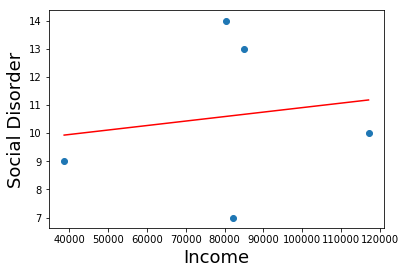

The r squared coefficient is:  0.0237894690626


In [28]:
#linear regression model of x being a column and y Disorder points.
x_variable = "Income"
y_variable = "Social Disorder"
x = combined_data[x_variable]
y = combined_data[y_variable]

plt.scatter(x, y)
plt.xlabel(x_variable, fontsize=18)
plt.ylabel(y_variable, fontsize=18)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color="r") #calculate line of best fit
plt.show()

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y) #gets the r_value
print("The r squared coefficient is: ", r_value**2)

Let's improve on our model even further. Right now we are choosing only one variable to try to explain our data. But in real life, there is not only one factor that contributes to social disorder; so why are we trying to explain it using only one variable? No wonder it's difficult to get the whole picture! We will now use multiple regression to use 2(or 3) variables to make our model even more accurate. Try changing up the column names to see close your regression line is now! Make sure to change the x and y names in the "ax.set_labels".

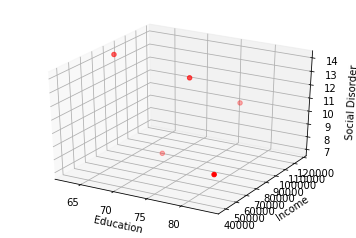

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

x = combined_data["Education"]
y = combined_data["Income"]
z = combined_data["Social Disorder"]

ax.scatter(x,y,z,c="r", marker="o")

ax.set_xlabel("Education")
ax.set_ylabel("Income")
ax.set_zlabel("Social Disorder")
plt.show()

#Cool graph to see but I dont think it really shows anything?

To recap, we did 4 things to analyze our real life data:
    
1)We observed the data on a map where we could click on various points and see the data. This gives an intuitive sense of how the data is spread and what we can expect. Having a physical picture of what the data could possibly be representing is often a good first step rather than jumping straight into the numbers.

2)We observed the data in table form. As nice as graphs are, it is not possible to sort a graph. Therefore, we turned our graph into table form, compressed the data, and looked for correlation between known statistics. It is an important part of to compare your collected results to known statistics. There is no point in collecting data if you cannot measure it against some standard.

3)Instead of eyeballing the table, we now turned it into a graph and computed the line of best fit. We also got an r_squared value which measured the correlation. This provides a more accurate representation of all data points rather than just looking at tables as well as the r_squared value which shows how "good" the line of best fit is.

4)You had some fun with 3d graphs.

We hoped you learn how to quantify your observations in a mathematical way and had some fun with manipulating data!
